In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
coordinates

[(-43.13732512498558, -41.10253985435915),
 (2.1063384735645485, -83.71536163254582),
 (-86.86791464371409, -167.1257342562491),
 (1.1393124017799465, 71.69844763065086),
 (46.00640183635559, 48.73408411913485),
 (-64.38192964853089, 38.997213025667975),
 (-51.86213169420024, -85.33961215346544),
 (13.39149397874533, 153.99301593999786),
 (-31.84558736977207, 64.35661059069827),
 (-70.59637762927768, -115.50463292463668),
 (-8.75624891604329, -126.53124772029955),
 (57.62836941974953, 91.52003873269274),
 (14.449821536916474, -21.355207773627285),
 (-64.49408567869075, -76.47820823941673),
 (-43.561463244550445, 85.99491047830588),
 (23.714994508822627, -159.32063570941216),
 (7.4499281307017355, 0.3935331415872554),
 (-86.49535179907598, -166.93283355927298),
 (62.88779561180857, 54.75305032062508),
 (32.45128541525075, -168.93930886523228),
 (10.779765578842486, -169.83181266121213),
 (-35.05004947910046, 40.85947935812891),
 (25.515013542716034, 5.2599390549904115),
 (67.80531630319

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | muisne
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | thinadhoo
Processing Record 5 of Set 1 | marfino
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | rassvet
Processing Record 12 of Set 1 | vila do maio
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | badou
Processing Record 16 of Set 1 | voyvozh
Processing Record 17 of Set 1 | beloha
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | raudeberg
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | kusy

Processing Record 38 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 4 | ijaki
City not found. Skipping...
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | ondjiva
Processing Record 44 of Set 4 | jiuquan
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | berbera
Processing Record 50 of Set 4 | ye
City not found. Skipping...
Processing Record 1 of Set 5 | ust-tsilma
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | ciudad bolivar
Processing Record 4 of Set 5 | nizwa
Processing Record 5 of Set 5 | camana
Processing Record 6 of Set 5 | katobu
Processing Record 7 of Set 5 | sibolga
Processing Record 8 of Set 5 | port antonio
Processing Record 9 of Set 5 

Processing Record 28 of Set 8 | dao
Processing Record 29 of Set 8 | vestmanna
Processing Record 30 of Set 8 | granja
Processing Record 31 of Set 8 | marawi
Processing Record 32 of Set 8 | gbarnga
Processing Record 33 of Set 8 | solnechnyy
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | kirakira
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | caraballeda
Processing Record 38 of Set 8 | ermoupolis
Processing Record 39 of Set 8 | brokopondo
Processing Record 40 of Set 8 | bemidji
Processing Record 41 of Set 8 | billings
Processing Record 42 of Set 8 | port macquarie
Processing Record 43 of Set 8 | simao
Processing Record 44 of Set 8 | minsk mazowiecki
Processing Record 45 of Set 8 | drovyanaya
Processing Record 46 of Set 8 | saulkrasti
Processing Record 47 of Set 8 | urusha
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | ojinaga
Processing Record 50 of Set 8 | makakilo city
Processing Record 1 of Set 9 | jutai
Proces

Processing Record 15 of Set 12 | sosnovo-ozerskoye
Processing Record 16 of Set 12 | roald
Processing Record 17 of Set 12 | konongo
Processing Record 18 of Set 12 | west bay
Processing Record 19 of Set 12 | yzeure
Processing Record 20 of Set 12 | la union
Processing Record 21 of Set 12 | sur
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | atambua
Processing Record 24 of Set 12 | mokhsogollokh
Processing Record 25 of Set 12 | soe
Processing Record 26 of Set 12 | ucluelet
Processing Record 27 of Set 12 | moussoro
Processing Record 28 of Set 12 | andra
Processing Record 29 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 30 of Set 12 | awbari
Processing Record 31 of Set 12 | sainte-marie
Processing Record 32 of Set 12 | san isidro
Processing Record 33 of Set 12 | mananjary
Processing Record 34 of Set 12 | puerto escondido
Processing Record 35 of Set 12 | hualmay
Processing Record 36 of Set 12 | abha
Processing Record 37 of Set 12 | a

In [16]:
len(city_data)

571

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.70,-53.46,38.68,76,0,7.20,UY,2020-08-21 00:43:33
1,Muisne,0.60,-80.03,72.99,85,87,9.19,EC,2020-08-21 00:43:33
2,Mataura,-46.19,168.86,49.10,88,100,2.30,NZ,2020-08-21 00:43:33
3,Thinadhoo,0.53,72.93,83.89,61,100,3.53,MV,2020-08-21 00:43:34
4,Marfino,55.70,37.38,55.00,81,0,2.24,RU,2020-08-21 00:43:34
5,Port Alfred,-33.59,26.89,58.26,77,100,9.44,ZA,2020-08-21 00:43:34
6,Punta Arenas,-53.15,-70.92,42.80,87,75,11.41,CL,2020-08-21 00:41:02
7,Kavieng,-2.57,150.80,83.95,74,35,8.84,PG,2020-08-21 00:43:34
8,Mahebourg,-20.41,57.70,66.20,77,20,8.05,MU,2020-08-21 00:43:35
9,Atuona,-9.80,-139.03,79.07,75,95,19.89,PF,2020-08-21 00:43:35


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_df = city_data_df[new_column_order]
reordered_city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-08-21 00:43:33,-33.70,-53.46,38.68,76,0,7.20
1,Muisne,EC,2020-08-21 00:43:33,0.60,-80.03,72.99,85,87,9.19
2,Mataura,NZ,2020-08-21 00:43:33,-46.19,168.86,49.10,88,100,2.30
3,Thinadhoo,MV,2020-08-21 00:43:34,0.53,72.93,83.89,61,100,3.53
4,Marfino,RU,2020-08-21 00:43:34,55.70,37.38,55.00,81,0,2.24
...,...,...,...,...,...,...,...,...,...
566,Narasannapeta,IN,2020-08-21 00:45:48,18.42,84.05,77.99,89,100,12.46
567,Alugan,PH,2020-08-21 00:45:48,12.22,125.48,83.48,71,100,3.76
568,Bathsheba,BB,2020-08-21 00:45:49,13.22,-59.52,80.60,88,75,10.29
569,Khromtau,KZ,2020-08-21 00:45:49,50.25,58.43,50.27,81,0,9.26


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/20/20'

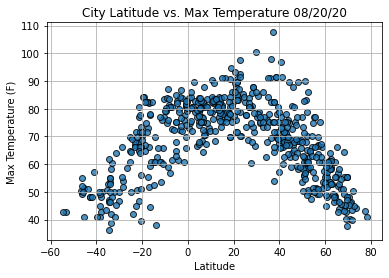

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

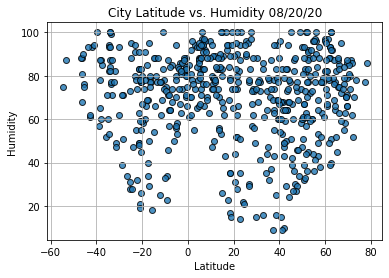

In [23]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

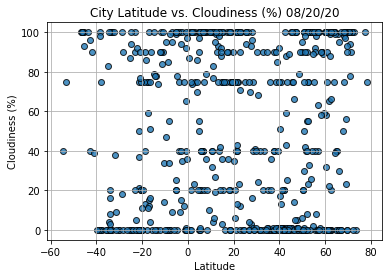

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

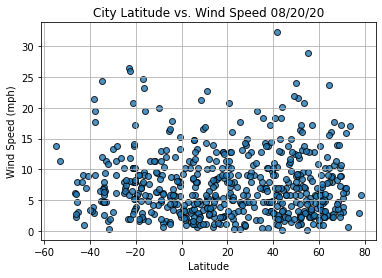

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [88]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(f'{title}')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [89]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Lat                         22.08
Lng                       -159.32
Max Temp                     84.2
Humidity                       66
Cloudiness                     75
Wind Speed                  16.11
Country                        US
Date          2020-08-21 00:43:36
Name: 13, dtype: object

In [90]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

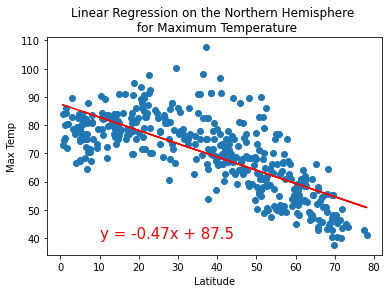

LinregressResult(slope=-0.469227225515125, intercept=87.50104325531096, rvalue=-0.736911204308825, pvalue=1.1207677177425841e-69, stderr=0.02157577933892853)

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
linregress(x_values, y_values)

In [118]:
# Perform linear regression.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = -0.47x + 87.5
The p-value is: 0.000 and the r-value is: -0.737


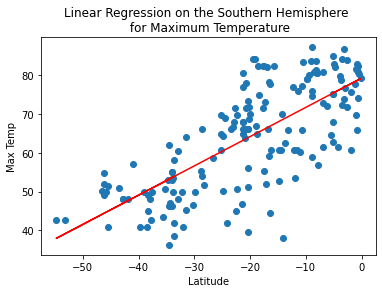

LinregressResult(slope=0.7534164803131869, intercept=79.24702727503168, rvalue=0.7334970523168362, pvalue=3.807364642001246e-30, stderr=0.05370391574233598)

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
linregress(x_values, y_values)

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = 0.75x + 79.25
The p-value is: 0.000 and the r-value is: 0.733


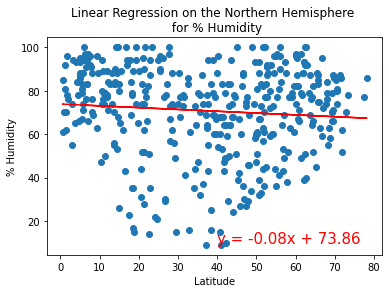

LinregressResult(slope=-0.0832615156353692, intercept=73.863394348015, rvalue=-0.08440936519618236, pvalue=0.09181236115087532, stderr=0.0492673771948518)

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

In [120]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = -0.08x + 73.86
The p-value is: 0.092 and the r-value is: -0.084


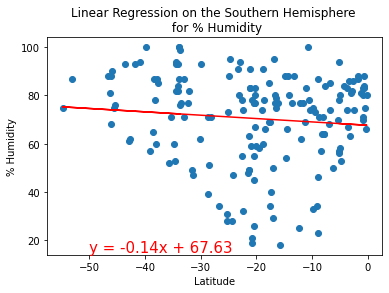

LinregressResult(slope=-0.1394758289736779, intercept=67.62585025322134, rvalue=-0.09780832893866533, pvalue=0.20313070746618186, stderr=0.10916726436235331)

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
linregress(x_values, y_values)

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = -0.14x + 67.63
The p-value is: 0.203 and the r-value is: -0.098


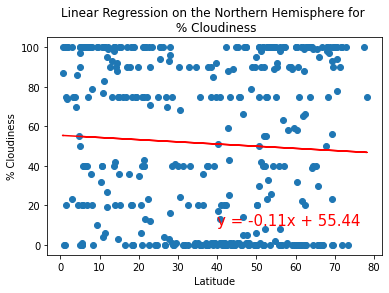

LinregressResult(slope=-0.1102283796616885, intercept=55.44447782537645, rvalue=-0.056255887617691354, pvalue=0.26165594641432743, stderr=0.09806083904350399)

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n % Cloudiness', '% Cloudiness',(40,10))
linregress(x_values, y_values)

In [122]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = -0.11x + 55.44
The p-value is: 0.262 and the r-value is: -0.056


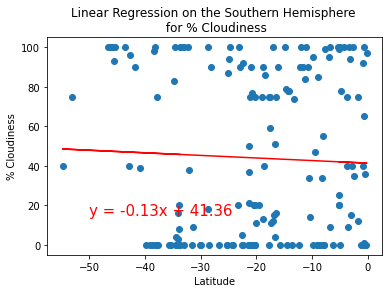

LinregressResult(slope=-0.1307810411733216, intercept=41.362597632366224, rvalue=-0.041897956266275835, pvalue=0.5863676172361689, stderr=0.2398982475593073)

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))
linregress(x_values, y_values)

In [123]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = -0.13x + 41.36
The p-value is: 0.586 and the r-value is: -0.042


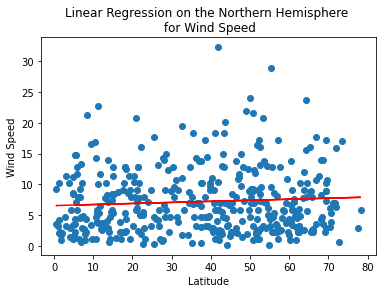

LinregressResult(slope=0.017134586479554913, intercept=6.584592458130766, rvalue=0.06949256155389949, pvalue=0.16538714160016618, stderr=0.012329418099924962)

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))
linregress(x_values, y_values)

In [124]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = 0.02x + 6.58
The p-value is: 0.165 and the r-value is: 0.069


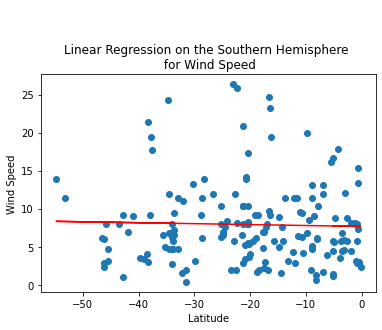

LinregressResult(slope=-0.012220706862375369, intercept=7.668462788299624, rvalue=-0.03105037102346533, pvalue=0.6868339117481965, stderr=0.030260543386848863)

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
linregress(x_values, y_values)

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

y = -0.01x + 7.67
The p-value is: 0.687 and the r-value is: -0.031
